In [37]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Filter all warnings 
warnings.filterwarnings("ignore")

In [38]:
data = pd.read_csv('../../data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [39]:
data.shape

(10000, 31)

In [40]:
# # get the first 10000 records
# data_10000 = data[:10000]

# # drop the rest of the records
# data_10000.drop(data_10000.index[10000:], inplace = True)

# data_10000.to_csv('../../data/creditcard.csv', index = False)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [42]:
data.shape

(10000, 31)

In [43]:
data.iloc[0:1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.16648,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,2.69,0


In [44]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [45]:
data.duplicated().sum()

42

Text(0.5, 1.0, 'Distribution of Fraud and Safe transactions ')

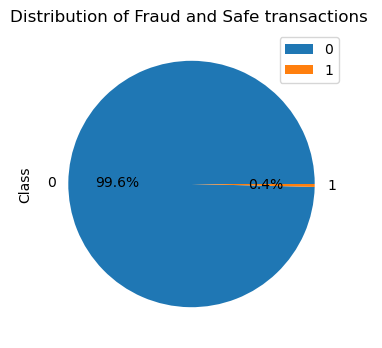

In [46]:
m = data['Class'].value_counts()
m.plot(kind ='pie', autopct = '%1.1f%%', figsize = (8,4))
plt.legend()
plt.title('Distribution of Fraud and Safe transactions ')

In [47]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.039722,-0.003806,0.055179,0.130931,-0.038669,-0.022831,-0.124947,-0.009080,0.469757,...,-0.023073,0.011208,0.015220,-0.017141,-0.019272,0.315836,-0.069739,-0.000027,-0.017208,0.042737
V1,0.039722,1.000000,-0.097843,-0.121481,0.048788,-0.195685,0.039459,-0.030500,0.229722,-0.113002,...,-0.127517,-0.031559,-0.116965,-0.010946,0.229844,0.046999,-0.086261,0.039498,-0.179281,-0.063092
V2,-0.003806,-0.097843,1.000000,-0.110150,0.073241,-0.061510,0.020584,0.128649,-0.175931,-0.082640,...,0.146127,-0.121056,0.066110,-0.030650,-0.143596,-0.082652,0.005853,-0.024778,-0.463938,0.166610
V3,0.055179,-0.121481,-0.110150,1.000000,0.017798,-0.045567,-0.135714,0.154030,0.000815,0.159167,...,-0.043060,0.273174,-0.037848,0.026368,-0.214381,0.071470,-0.114050,-0.117352,-0.162533,-0.390148
V4,0.130931,0.048788,0.073241,0.017798,1.000000,-0.091383,-0.007986,-0.101071,0.043829,-0.145507,...,-0.012646,0.001805,-0.002289,-0.054207,-0.032177,0.038360,0.000357,0.034068,0.104713,0.229445
V5,-0.038669,-0.195685,-0.061510,-0.045567,-0.091383,1.000000,0.110974,-0.139876,0.090965,-0.037087,...,-0.045856,-0.115169,-0.055037,0.020260,-0.023290,-0.138144,0.014809,-0.149227,-0.390706,-0.062716
V6,-0.022831,0.039459,0.020584,-0.135714,-0.007986,0.110974,1.000000,-0.019382,-0.015639,-0.001573,...,0.068078,-0.064346,0.013168,0.026905,0.088958,-0.049359,-0.062847,0.004308,0.220732,-0.106035
V7,-0.124947,-0.030500,0.128649,0.154030,-0.101071,-0.139876,-0.019382,1.000000,0.149132,-0.025127,...,-0.155974,0.070534,0.013027,0.000103,-0.074639,-0.110663,-0.118780,-0.072624,0.327198,-0.212421
V8,-0.009080,0.229722,-0.175931,0.000815,0.043829,0.090965,-0.015639,0.149132,1.000000,-0.097338,...,-0.325657,0.159250,-0.070067,0.007480,0.025651,0.029764,0.047622,0.084006,-0.078290,0.059611
V9,0.469757,-0.113002,-0.082640,0.159167,-0.145507,-0.037087,-0.001573,-0.025127,-0.097338,1.000000,...,-0.006781,0.033507,-0.013046,0.010344,0.120028,0.171466,-0.067867,-0.109900,-0.008973,-0.164612


In [48]:
Q1 = np.percentile(data['Amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [49]:
IQR

45.89

In [50]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [52]:
upper = np.where(data['Amount'] >= (Q3+1.5*IQR))
lower = np.where(data['Amount'] <= (Q1-1.5*IQR))

In [53]:
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

In [56]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [58]:
data.Class.unique()

array([0, 1])

In [59]:
data.Class.value_counts()

0    8729
1      34
Name: Class, dtype: int64

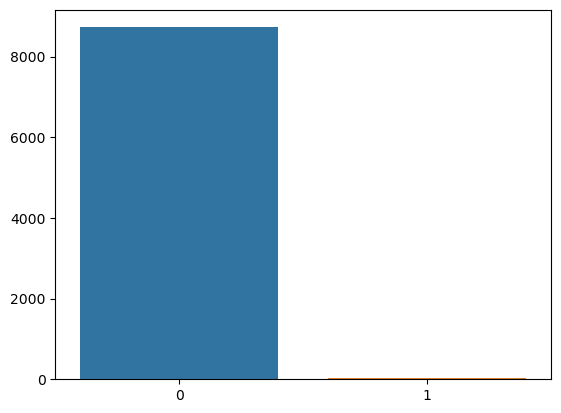

In [60]:
sb.barplot(x = data.Class.value_counts().index, y = data.Class.value_counts().values)
plt.show()

In [61]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,6038.559283,-0.185594,0.463877,0.931783,0.245958,0.055368,0.080101,-0.117082,-0.051526,0.797121,...,-0.057813,-0.158452,-0.027431,0.021643,0.080827,0.105833,0.008329,-0.000414,23.459347,0.003880
std,4492.787095,1.463545,1.098568,1.156847,1.420197,1.055148,1.259567,0.941287,1.225235,1.134085,...,0.916026,0.620828,0.349205,0.596040,0.423788,0.556923,0.400033,0.230084,26.351599,0.062172
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-5.759924,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-11.669994,-2.512377,-2.483069,-1.338556,-6.573218,-3.509250,0.000000,0.000000
25%,2108.500000,-0.962922,-0.086707,0.449980,-0.609428,-0.548257,-0.659145,-0.550342,-0.181781,0.077626,...,-0.273006,-0.553016,-0.156993,-0.330741,-0.169615,-0.327109,-0.081177,-0.016028,4.490000,0.000000
50%,4664.000000,-0.368639,0.383852,0.965807,0.213915,-0.081382,-0.191569,-0.070927,0.014774,0.798605,...,-0.137332,-0.139421,-0.040400,0.081700,0.115653,0.049775,-0.000493,0.013022,14.470000,0.000000
75%,10488.000000,1.173865,0.980135,1.623452,1.104163,0.412024,0.425593,0.443204,0.274616,1.490510,...,0.013049,0.234075,0.076434,0.410511,0.354576,0.460012,0.130645,0.074309,34.675000,0.000000
max,15013.000000,1.960497,8.636214,4.101716,10.463020,34.099309,7.074414,4.648472,5.060381,10.392889,...,22.588989,4.359627,3.642683,3.200201,1.972515,3.087444,8.254376,2.619298,119.580000,1.000000


In [62]:
data.Amount

0        2.69
3       69.99
4        3.67
5        4.99
6       40.80
        ...  
9994    53.19
9995    12.18
9996     4.05
9997     4.05
9999    12.99
Name: Amount, Length: 8763, dtype: float64

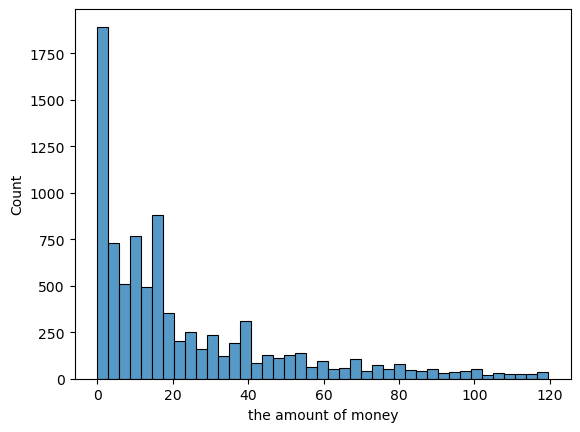

In [63]:
sb.histplot(data.Amount)
plt.xlabel('the amount of money')
plt.show()

In [64]:
data.nlargest(10, 'Amount')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9469,14025,-1.854433,0.854424,2.655404,1.256375,-0.707800,-0.279509,0.431302,-0.257062,1.926273,...,-0.197866,0.602518,-0.332229,0.919607,0.496518,-0.189141,0.548609,0.294897,119.58,0
3336,2889,-1.394620,-0.273562,0.086733,1.170759,-1.331303,0.535193,-0.918443,0.857104,-1.130328,...,0.040365,0.512934,-0.140624,-0.417347,-1.339774,-0.180519,0.021824,-0.091479,119.50,0
2892,2439,-3.938301,-4.371854,1.823761,-0.423043,1.464054,-0.033503,-2.568626,1.388399,-0.210365,...,0.848183,1.162638,0.079765,-0.542674,-0.012250,-0.082377,0.092987,-0.553252,119.44,0
3794,3307,0.931541,-0.675905,1.149347,0.359354,-1.196286,-0.047082,-0.507410,0.084866,1.015978,...,-0.106038,-0.214126,0.040064,0.507253,0.012508,0.937052,-0.031180,0.035641,119.44,0
6435,7638,0.868625,-1.025389,2.052686,0.909000,-1.884301,0.681711,-1.423085,0.369039,3.083057,...,0.010320,0.509785,-0.167700,0.615963,0.166079,1.172392,-0.031733,0.025152,119.43,0
6094,6960,-3.741565,0.460549,1.835173,1.359940,0.696712,2.694758,1.651309,-2.041896,4.162809,...,-0.387728,1.559424,-0.597381,-0.893311,-1.007458,-0.563821,-5.107789,-2.194509,119.40,0
3146,2722,-1.346588,0.738050,0.996290,0.582268,-0.484351,0.995456,0.487335,0.454388,-0.055398,...,-0.114787,0.143704,0.134450,-0.266621,-0.504542,0.353527,-0.168829,-0.163116,119.21,0
4965,4524,0.948708,0.773464,0.554057,3.954141,0.278388,-0.385652,0.626363,-0.301451,-0.393871,...,-0.451939,-1.434677,0.075339,0.248700,0.265900,-0.387574,-0.078890,0.038483,119.14,0
3620,3096,-0.249964,-0.371521,1.410132,-1.126919,-1.219167,0.878293,-0.493258,0.146646,-0.784497,...,0.499965,1.472650,-0.040344,-0.785061,-0.361566,-0.005049,-0.075794,0.026576,119.00,0
8356,11174,0.852851,-0.291077,0.619272,1.455593,-0.174818,0.846560,-0.301851,0.258435,1.654680,...,-0.039600,0.150426,-0.157299,-0.319206,0.488645,-0.294904,0.018054,0.017044,119.00,0


In [66]:
x = data.nlargest(10, 'Amount').Class
  
def unique(li):
    value_counts = []
    for i in li:
        c = li.count(i)
        value_counts.append((i,c))
    return value_counts

In [67]:
x

9469    0
3336    0
2892    0
3794    0
6435    0
6094    0
3146    0
4965    0
3620    0
8356    0
Name: Class, dtype: int64

In [68]:
from collections import Counter
Counter(x)

Counter({0: 10})

In [70]:
Counter(data.nlargest(100, 'Amount').Class)

Counter({0: 100})

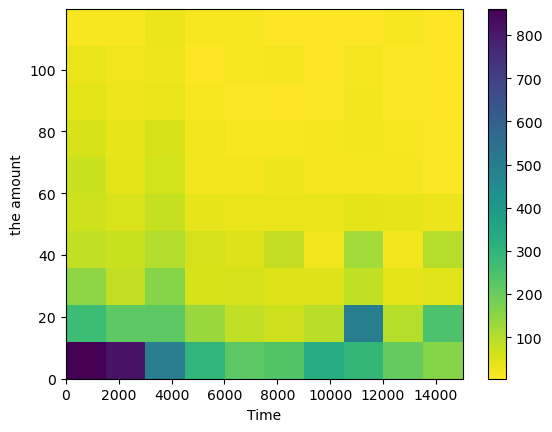

In [72]:
plt.hist2d(data= data, x = 'Time', y = 'Amount', cmin = 0.5,
    cmap = 'viridis_r' )
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('the amount')
plt.show()

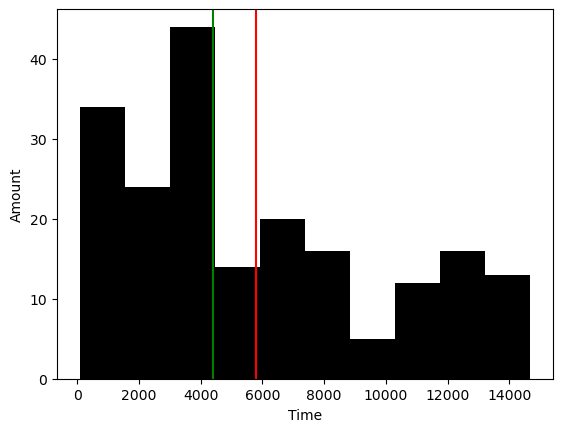

In [77]:
step_amount_avg = data[data.Amount >= 100]['Time']
plt.hist(step_amount_avg, color = 'black')
plt.axvline(step_amount_avg.mean(), color = 'red')
plt.axvline(step_amount_avg.median(), color = 'green')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [79]:
import scipy.stats as st

st.t.interval(alpha=0.90, df=len(step_amount_avg)-1,
              loc=np.mean(step_amount_avg),
              scale=st.sem(step_amount_avg))

(5310.054106987131, 6297.168115235092)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8763 non-null   int64  
 1   V1      8763 non-null   float64
 2   V2      8763 non-null   float64
 3   V3      8763 non-null   float64
 4   V4      8763 non-null   float64
 5   V5      8763 non-null   float64
 6   V6      8763 non-null   float64
 7   V7      8763 non-null   float64
 8   V8      8763 non-null   float64
 9   V9      8763 non-null   float64
 10  V10     8763 non-null   float64
 11  V11     8763 non-null   float64
 12  V12     8763 non-null   float64
 13  V13     8763 non-null   float64
 14  V14     8763 non-null   float64
 15  V15     8763 non-null   float64
 16  V16     8763 non-null   float64
 17  V17     8763 non-null   float64
 18  V18     8763 non-null   float64
 19  V19     8763 non-null   float64
 20  V20     8763 non-null   float64
 21  V21     8763 non-null   float64
 22  

In [ ]:
# print(f'the number of unique values of nameOrig is : {round((len(data.nameOrig.unique()) * 100) / data.shape[0], 2)} %')

In [ ]:
# data[data.nameOrig == 'C1065307291']

In [ ]:
# Messi = data.nameOrig.mode()

In [ ]:
# original_name = []
# for i in Messi.values:
#     original_name.append((i,data[data.nameOrig == i].shape[0]))
# for j in original_name:
#     print(j)

In [ ]:
# data.nameOrig = data.nameOrig.str.replace('C','').astype('int')
# data.rename(columns = {'nameOrig': 'client_id'}, inplace = True)

In [ ]:
# data.client_id

In [ ]:
# data.oldbalanceOrg

In [ ]:
# data.oldbalanceOrg.describe()

In [ ]:
# plt.figure(figsize = [10,7])
# plt.hist(data.oldbalanceOrg, bins = 30)
# plt.title('the old balance distribution')
# plt.show()

In [ ]:
# plt.figure(figsize = [10,7])
# plt.plot(data.oldbalanceOrg)
# plt.show()

In [ ]:
# data.nlargest(20, 'oldbalanceOrg')

In [ ]:
# plt.figure(figsize = [10,7])
# sb.barplot(x = data.nlargest(10, 'oldbalanceOrg').client_id, y = data.nlargest(10, 'oldbalanceOrg').oldbalanceOrg)
# plt.xticks(rotation = 17.5)
# plt.title('the largest 10 balances before transaction')
# plt.xlabel('Client Id')
# plt.ylabel('The Balance')
# plt.show()

In [ ]:
# data.newbalanceOrig

In [ ]:
# data.newbalanceOrig.describe()

In [ ]:
# plt.figure(figsize = [10,7])
# plt.hist(data.newbalanceOrig, bins = 30)
# plt.title('the  balance after transaction distribution')
# plt.show()

In [ ]:
# plt.figure(figsize = [10,7])
# plt.plot(data.newbalanceOrig)
# plt.show()

In [ ]:
# data.nlargest(20, 'newbalanceOrig')

In [ ]:
# plt.figure(figsize = [10,7])
# sb.barplot(x = data.nlargest(10, 'newbalanceOrig').client_id, y = data.nlargest(10, 'newbalanceOrig').newbalanceOrig)
# plt.xticks(rotation = 17.5)
# plt.title('the largest 10 balances after transaction')
# plt.xlabel('Client Id')
# plt.ylabel('The Balance')
# plt.show()

In [81]:
num_of_samples = 10 / data.Class[0]

In [82]:
data.Class[0]

0

In [84]:
# samp1 = data.sample(n = 600000)

In [86]:
# samp1

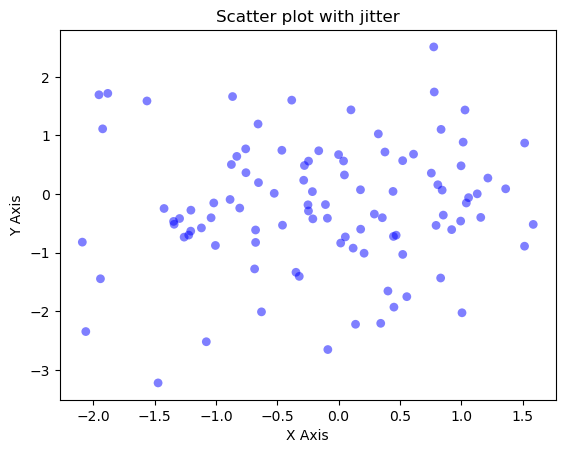

In [87]:
# Generate some random data
x = np.random.normal(0, 1, size=100)
y = np.random.normal(0, 1, size=100)

# Create a scatter plot with jitter
plt.scatter(x=x, y=y, alpha=0.5, edgecolors='none', s=40, c='blue', linewidth=0.5, rasterized=True)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Scatter plot with jitter')
plt.show()

In [ ]:
# data[['oldbalanceOrg', 'newbalanceOrig']].corr()

In [ ]:
# data['balance_diff'] = data.oldbalanceOrg - data.newbalanceOrig

In [ ]:
# data.balance_diff.describe()

In [ ]:
# plt.figure(figsize = [10,7])
# plt.hist(data.balance_diff, bins=50)
# plt.title('the  balance after transaction distribution')
# plt.show()

In [ ]:
# plt.figure(figsize=[10,7])
# plt.plot(data.balance_diff)
# plt.title('the balance rate of change')
# plt.show()

In [ ]:
# data.head()


In [ ]:
# data.nameDest.describe()

In [ ]:
# data.nameDest.mode()

In [ ]:
# # get top 10 most frequent client distination id
# n = 10
# data['nameDest'].value_counts()[:n]

In [ ]:
# plt.figure(figsize = [10, 7])
# sb.barplot(x = data['nameDest'].value_counts()[:n].index, y = data['nameDest'].value_counts()[:n].values)
# plt.xticks(rotation = 20)
# plt.title('the most 10 frequent distination clients')
# plt.show()

In [ ]:
# data[data.nameDest == 'C1286084959']

In [ ]:
# totti = data[data.nameDest == 'C1286084959']
# totti.describe()

In [ ]:
# totti[totti.newbalanceDest == totti.newbalanceDest.max()]

In [ ]:
# totti[(totti.isFraud == 1) | (totti.isFlaggedFraud == 1)]

In [ ]:
# data[data.isFraud == 1]

In [ ]:
# data[data.isFlaggedFraud == 1]

In [89]:
# # get top 10 most frequent fraud distination clients
# x = data[data.isFraud == 1]
# n = 10
# Ramos = x['nameDest'].value_counts()[:n]
# Ramos

In [ ]:
# for i in Ramos.index:
#     if i in data['nameDest'].value_counts()[:n].index:
#         print(i)

In [ ]:
# data.nameDest = data.nameDest.replace('C','')
# data.nameDest = data.nameDest.replace('M','')
# data.rename(columns = {'nameDest' : 'distination_client_id'}, inplace = True)

In [91]:
# data.isFraud.value_counts()

In [ ]:
# plt.pie(data.isFraud.value_counts(),
#         autopct='%1.1f%%', pctdistance=0.85)
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# plt.show()

In [92]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (8729, 31)
class 1: (34, 31)


In [94]:
# class_0_under = class_0.sample(class_count_1)

# balancing_data = pd.concat([class_0_under, class_1], axis=0)

# print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
# balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# balancing_data

In [ ]:
# balancing_data.info()

In [ ]:
# balancing_data.type.unique()

In [ ]:
# balancing_data["type"] = balancing_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [ ]:
# balancing_data.type.dtype

In [ ]:
# balancing_data.columns

In [ ]:
# X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
# y = balancing_data.loc[:,'isFraud'].values

In [ ]:
# x

In [ ]:
# y

In [95]:
# Separate features and labels
X = data.drop('Class', axis=1)
y = data['Class']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
X_train.shape,X_test.shape

((7010, 30), (1753, 30))

In [98]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[ 6.05573409e+03 -1.81518566e-01  4.59353182e-01  9.35169890e-01
  2.37692438e-01  6.39536264e-02  7.43762713e-02 -1.09592889e-01
 -3.28240629e-02  7.92850303e-01 -2.01795117e-01  7.92329510e-01
 -1.30658995e+00  8.58447882e-01  7.09674979e-01 -1.06687248e-01
  1.14523424e-02  2.95208920e-01 -2.76195880e-02 -7.16278286e-02
 -1.00679351e-02 -7.07059157e-02 -1.54972332e-01 -3.54109329e-02
  1.59995132e-02  7.88897903e-02  1.04727865e-01  1.21408220e-02
  7.59797282e-05  2.34585278e+01]


In [99]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [101]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [102]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 1.0
Testing Accuracy: 1.0
Testing Confusion Matrix: 
[[1748    0]
 [   0    5]]
Recall Score :  1.0
Precision Score :  1.0
Testing F-1: 1.0
Testing F-Beta: 1.0
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9998573466476463
Testing Accuracy: 1.0
Testing Confusion Matrix: 
[[1748    0]
 [   0    5]]
Recall Score :  1.0
Precision Score :  1.0
Testing F-1: 1.0
Testing F-Beta: 1.0
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 1.0
Testing Confusion Matrix: 
[[1748    0]
 [   0    5]]
Recall Score :  1.0
Precision Score :  1.0
Testing F-1: 1.0
Testing F-Beta: 1.0
------------------------------
Training Model RF 
--------------
Training Accuracy: 1.0
Testing Accuracy: 1.0
Testing Confusion Matrix: 
[[1748    0]
 [   0    5]]
Recall Score :  1.0
Precision Score :  1.0
Testing F-1: 1.0
Testing F-Beta: 1.0
------------------------------
Training

In [103]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [104]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [105]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [106]:
rounded_y = np.round(y_pred)
unique_val = pd.DataFrame(y_test)
unique_val[0].unique()

array([0, 1])

In [107]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = unique_val[0].unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[   5,    0],
        [   0, 1748]],

       [[1748,    0],
        [   0,    5]]])

In [108]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
5,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
6,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


In [109]:
if  model.predict([[2,9839.64,170136.0,160296.36,9839.64]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

is Fraud
